In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02 00:00:00+00:00,17.969599,18.013729,18.107130,17.846855,17.918339,102033017
1,2013-01-03 00:00:00+00:00,17.980036,18.024191,18.229919,17.950716,18.055573,93075567
2,2013-01-04 00:00:00+00:00,18.335327,18.380356,18.467529,18.124067,18.165413,110954331
3,2013-01-07 00:00:00+00:00,18.255325,18.300158,18.415474,18.196297,18.317591,66476239
4,2013-01-08 00:00:00+00:00,18.219299,18.264042,18.338762,18.043119,18.319834,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22 00:00:00+00:00,142.370361,142.720001,143.250000,142.054993,142.130005,18494700
2764,2023-12-26 00:00:00+00:00,142.470123,142.820007,143.945007,142.500000,142.979996,11170100
2765,2023-12-27 00:00:00+00:00,141.093506,141.440002,143.320007,141.050995,142.830002,17288400


In [5]:
ma_100_days = data.Close.rolling(100).mean()

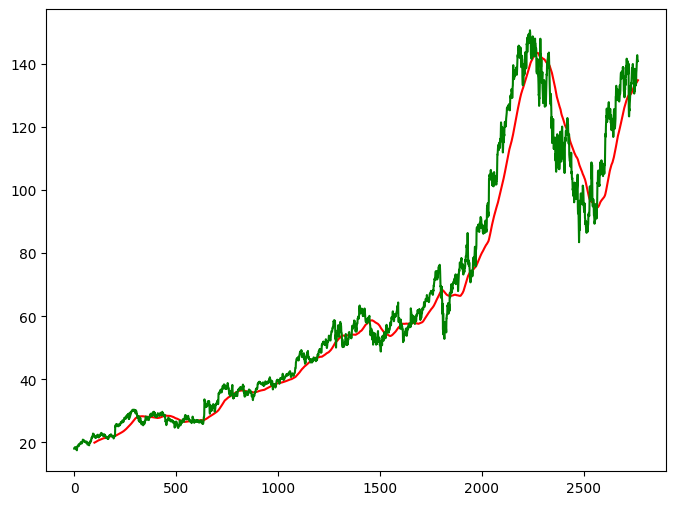

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot((data.Close), 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

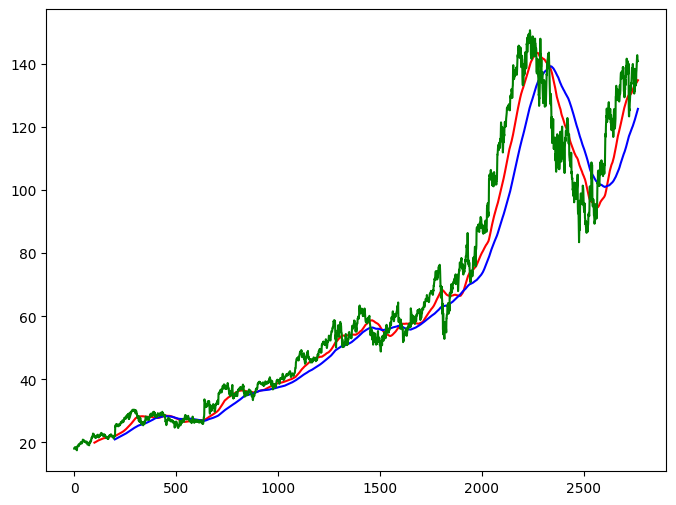

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2214

In [12]:
data_test.shape[0]

554

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\manua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - loss: 0.0562
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - loss: 0.0057
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.0052
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 0.0047
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - loss: 0.0036
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 0.0037
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0028
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 0.0031
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - loss: 0.0030
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0028
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0025
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 0.0027
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 0.0025
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - loss: 0.0031
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step


In [32]:
scale = 1/scaler.scale_

In [33]:
y_predict = y_predict*scale

In [34]:
y = y*scale

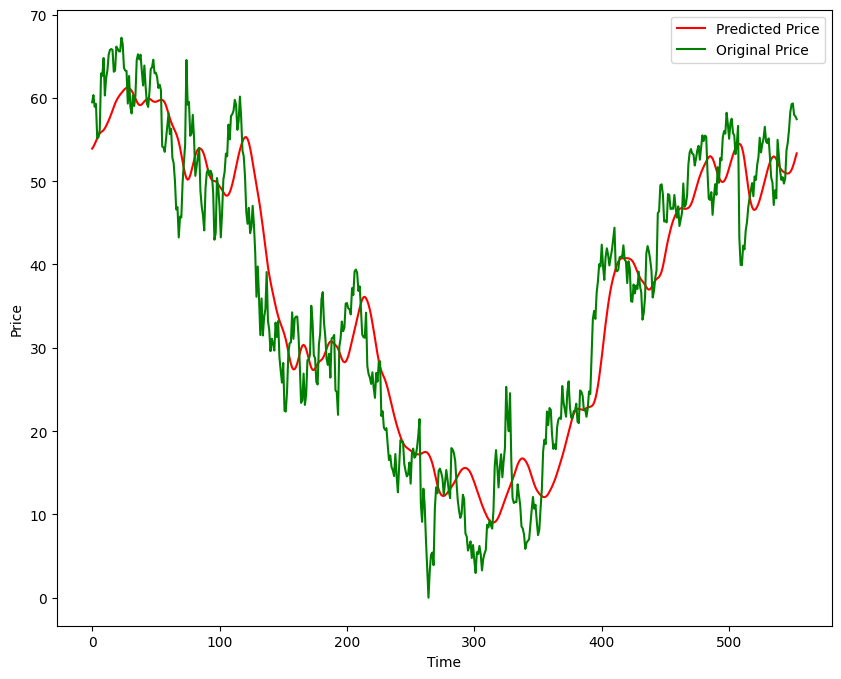

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
model.save('Stock Predictions Model.keras')